In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [2]:
pip install gseapy

     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 964 kB 3.4 MB/s eta 0:00:01
  Using cached grequests-0.6.0-py3-none-any.whl (5.2 kB)
     |████████████████████████████████| 47 kB 5.2 MB/s eta 0:00:01
  Using cached easydev-0.12.0-py3-none-any.whl
     |████████████████████████████████| 4.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 4.9 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached gevent-21.12.0-cp38-cp38-macosx_10_14_x86_64.whl (1.9 MB)
  Using cached zope.interface-5.4.0-cp38-cp38-macosx_10_14_x86_64.whl (208 kB)
     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  ERROR: Command errored 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-06-08 16:01.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [4]:
import os
os.chdir('F:/Ko/PD-1_responders')

In [5]:
import scanpy.external as sce

In [6]:
# 69 patients immune datasets

adata_69_imn = sc.read('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/Group_ABC_after_celltype_clustering_Myel_Tcell_group_added.h5ad')

In [7]:
adata_69_imn.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,percent_mt2,n_counts,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,6,0,198.197769,...,0.012949,1452.073242,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,6,0,213.666718,...,0.012717,882.995728,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,6,0,221.148575,...,0.019644,956.411804,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGCATGCCTTC-1-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,14,0,161.333832,...,0.018264,1262.646240,14,Myeloid cell,M1 Macrophage,Group A,Dinh dataset,NaN,T_3,Myeloid_2
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,6,0,176.360626,...,0.015792,1091.559448,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAGCCATT-1-24-2,4456.0,4328,1867.209229,29.546848,1.582407,tumor,P001,0,2,172.502136,...,0.015824,1867.209229,0,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGGTTGTCACCCAG-1-24-2,689.0,642,487.017822,17.679008,3.630054,tumor,P001,5,2,59.435638,...,0.036301,487.017822,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAAGCGCTTAT-1-24-2,248.0,235,523.794067,8.050291,1.536919,tumor,P001,5,2,57.140697,...,0.015369,523.794067,5,Plasma cell,Plasma cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2644,1972.602417,24.433256,1.238631,tumor,P001,10,2,120.637726,...,0.012386,1972.602417,10,T cell,exhausted T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3


In [8]:
adata_69T = adata_69_imn[adata_69_imn.obs['crude']=='T cell']

In [9]:
# PD-1 response-based T cell
adata_PD_T = sc.read('T_cell_isolated.h5ad')

In [10]:
adata_PD_T.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,patient,file_name,leiden,batch,total_counts_ribo,pct_counts_ribo,total_counts_hb,pct_counts_hb,celltype,crude,celltype_detail,response
CTTGCCGTCGGA-0,3741,3635,1397.243774,19.050234,1.363415,nonresponder_1,PD1-D1,8,0,101.290787,7.249329,1.210672,0.086647,T cell,NaN,CD8 T cell,Nonresponders
CATTGATCCAGT-0,2703,2634,1402.153442,21.471428,1.531318,nonresponder_1,PD1-D1,8,0,116.315269,8.295473,1.858456,0.132543,T cell,NaN,CD8 T cell,Nonresponders
GGCGACACGTAC-0,2184,2142,1405.822388,27.640001,1.966109,nonresponder_1,PD1-D1,8,0,137.818497,9.803408,1.999074,0.142200,T cell,NaN,CD8 T cell,Nonresponders
TAGCTAATGAAC-0,1730,1695,1401.805054,21.381281,1.525268,nonresponder_1,PD1-D1,8,0,134.718109,9.610331,1.546091,0.110293,T cell,NaN,CD8 T cell,Nonresponders
CACCTTGTCTGC-0,2022,1981,1401.692505,24.470905,1.745811,nonresponder_1,PD1-D1,8,0,134.183838,9.572987,0.503956,0.035953,T cell,NaN,CD8 T cell,Nonresponders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAAGAGCGATG-5,573,568,2128.075684,78.165314,3.673051,responder_3,PD1-S3,3,5,219.067154,10.294143,4.239720,0.199228,T cell,NaN,CD8 T cell,Responders
AATGTTGCCAAG-5,594,582,2106.455566,69.969345,3.321662,responder_3,PD1-S3,3,5,261.601166,12.419022,8.668961,0.411543,T cell,NaN,CD8 T cell,Responders
ATTCACGCAGGA-5,601,593,2120.158691,56.815372,2.679770,responder_3,PD1-S3,3,5,240.439865,11.340654,8.646555,0.407826,T cell,NaN,CD8 T cell,Responders
GCTCACGGCAGG-5,560,541,2078.378662,57.489052,2.766053,responder_3,PD1-S3,3,5,346.141968,16.654423,8.568939,0.412290,T cell,NaN,CD8 T cell,Responders


In [11]:
adata_69T.obs['patient']

AAACCTGAGTAGCCGA-1-0-0     P686
AAACCTGCAAGAGGCT-1-0-0     P686
AAACCTGCAGTATCTG-1-0-0     P686
AAACCTGGTGCCTGGT-1-0-0     P686
AAACCTGGTGCGCTTG-1-0-0     P686
                           ... 
TTTGGTTAGCAAATCA-1-24-2    P001
TTTGGTTAGTGGTAAT-1-24-2    P001
TTTGGTTCAAGCCATT-1-24-2    P001
TTTGTCAGTCCTCTTG-1-24-2    P001
TTTGTCAGTCTCTTTA-1-24-2    P001
Name: patient, Length: 114974, dtype: category
Categories (69, object): ['P001', 'P002', 'P008', 'P009A', ..., 'P865', 'P866', 'P944', 'P986']

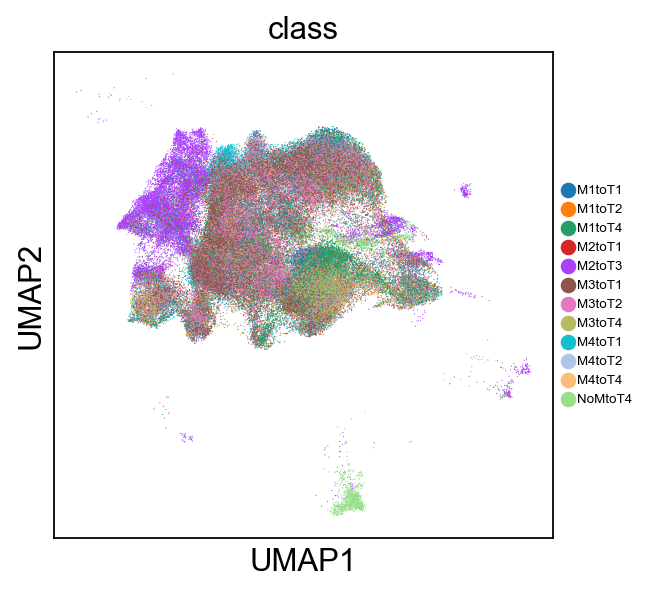

In [12]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",],
             'M2toT1': ["P010",	"P130",],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",],
             'M4toT2': ["P019",	"P054",	"P128",],
             'M4toT3': [],
             'M4toT4': ["P039",],
             'NoMtoT4': ["P009A",]
            }

# Initialize empty column in cell metadata
adata_69T.obs['class'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_69T.obs.patient).isin(cell_dict[i])
    adata_69T.obs.loc[ind,'class'] = i

sc.pl.umap(adata_69T, color=['class'], legend_loc='right margin', legend_fontsize=6)#, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


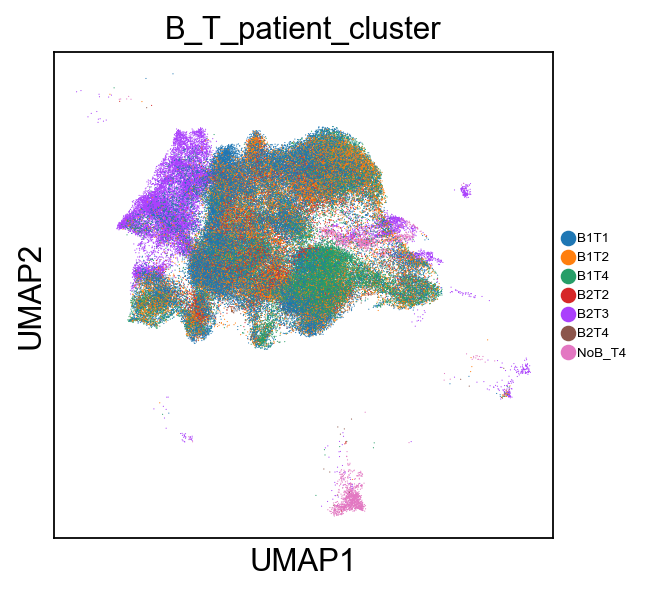

In [13]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'B1T1': ["P065",	"P062",	"P030",	"P057",	"P063",	"P012",	"P056",	"P027",	"P008",	"P001",	"P130",	"P028",	"P011",	"P126",	"P061",	"P010",	"P021",	"P015",	"P020",	"P032",	"P127",	"P049",	"P016",
],
             'B1T2':["P104",	"P128",	"P054",	"P002",	"P079",	"P076",	"P023",	"P084",	"P087",	"P017",	"P026",	"P042",	"P083",	"P019",	"P036",	"P037",	"P089",
],
             'B1T3':[],
             'B1T4':["P074",	"P052",	"P039",	"P075",	"P091",	"P009B",	"P024",	"P022",	"P080",	"P082",	"P047",	"P038",
],
            
             'B2T1': [],
            'B2T2': ["P048",	"P094",	"P031",	"P107",
],
             'B2T3':["P866",	"P836",	"P846",	"P986",	"P585",	"P658",	"P865",	"P944",	"P787",	"P686",
],
             'B2T4':["P040",	"P044",
],
             'NoB_T4':['P009A']
            }

# Initialize empty column in cell metadata
adata_69T.obs['B_T_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_69T.obs.patient).isin(cell_dict[i])
    adata_69T.obs.loc[ind,'B_T_patient_cluster'] = i

sc.pl.umap(adata_69T, color=['B_T_patient_cluster'], legend_loc='right margin', legend_fontsize=6)#, save='umap_allcell_Myeloid_to_T_cluster44.pdf')


In [14]:
adata_PD_T.obs['T_patient_cluster4'] = adata_PD_T.obs['patient']

In [15]:
adata_PD_T.obs['class']= adata_PD_T.obs['response']
adata_PD_T.obs['class']

CTTGCCGTCGGA-0    Nonresponders
CATTGATCCAGT-0    Nonresponders
GGCGACACGTAC-0    Nonresponders
TAGCTAATGAAC-0    Nonresponders
CACCTTGTCTGC-0    Nonresponders
                      ...      
TTAAGAGCGATG-5       Responders
AATGTTGCCAAG-5       Responders
ATTCACGCAGGA-5       Responders
GCTCACGGCAGG-5       Responders
TTGCCTTCGAAT-5       Responders
Name: class, Length: 6394, dtype: category
Categories (2, object): ['Nonresponders', 'Responders']

In [16]:
adata_PD_T.obs['class_2'] = adata_PD_T.obs['patient']
adata_PD_T.obs['class_2']

CTTGCCGTCGGA-0    nonresponder_1
CATTGATCCAGT-0    nonresponder_1
GGCGACACGTAC-0    nonresponder_1
TAGCTAATGAAC-0    nonresponder_1
CACCTTGTCTGC-0    nonresponder_1
                       ...      
TTAAGAGCGATG-5       responder_3
AATGTTGCCAAG-5       responder_3
ATTCACGCAGGA-5       responder_3
GCTCACGGCAGG-5       responder_3
TTGCCTTCGAAT-5       responder_3
Name: class_2, Length: 6394, dtype: category
Categories (6, object): ['nonresponder_1', 'nonresponder_2', 'nonresponder_3', 'responder_1', 'responder_2', 'responder_3']

In [17]:
pd.crosstab(adata_PD_T.obs['celltype_detail'],adata_PD_T.obs['celltype'])

celltype,T cell
celltype_detail,
CD4 T cell,2253
CD8 T cell,4065
NK cell,76


In [18]:
pd.crosstab(adata_PD_T.obs['celltype_detail'],adata_PD_T.obs['celltype'])

celltype,T cell
celltype_detail,
CD4 T cell,2253
CD8 T cell,4065
NK cell,76


In [27]:
#Reference : Maayanlab, REACTOME
PD1_genes = ['CD247','CD274','CD3D','CD3E','CD3G','CD4','CSK','HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DQA2','HLA-DQB1','HLA-DQB2',
            'HLA-DRA','HLA-DRB1','HLA-DRB3','HLA-DRB4','HLA-DRB5','LCK','PDCD1']

IFN_genes = ["IFIT3",	"IRF4",	"IRF9",	"IRF2",	"IRF7",	"IRF6",	"IRF1",	"IRF5",	"IRF8",	"IRF3",	"IFI6",	"SAMHD1",	"EGR1",	"OAS2",	"OAS1",	"OAS3",	"OASL",	"BST2",	"ADAR",	"ISG20",	"IFI27",	"IP6K2",	"IFITM3",	"ISG15",	"RNASEL",	"XAF1",	"RSAD2",	"IFI35",	"HLA-H",	"HLA-G",	"HLA-B",	"HLA-F",	"HLA-E",	"HLA-A",	"HLA-C",	"IFIT5",	"GBP2",	"IFIT1",	"PSMB8",	"IFITM1",	"IFIT2",	"IFITM2",	"MX2",	"MX1",	"SMAD7",	"B2M",	"FCGR1B",	"FCGR1A",	"PML",	"PTAFR",	"MT2A",	"SP100",	"NCAM1",	"CD44",	"VCAM1",	"ICAM1",	"IFI30",	"GBP5",	"GBP3",	"GBP6",	"GBP7",	"GBP4",	"GBP1",	"HLA-DQA1",	"HLA-DPA1",	"HLA-DQB2",	"HLA-DRB3",	"HLA-DRB1",	"HLA-DRA",	"HLA-DQB1",	"HLA-DRB4",	"HLA-DQA2",	"HLA-DPB1",	"HLA-DRB5",	"CIITA",	"TRIM29",	"TRIM35",	"TRIM46",	"TRIM45",	"TRIM2",	"TRIM10",	"TRIM14",	"TRIM48",	"TRIM6",	"TRIM17",	"TRIM3",	"TRIM38",	"TRIM22",	"TRIM31",	"TRIM68",	"TRIM62",	"TRIM34",	"TRIM26",	"TRIM25",	"TRIM5",	"MID1",	"TRIM8",	"TRIM21"
]

IL_genes =["AGER",	"AIP",	"AKT1",	"ALOX15",	"ALOX5",	"ALPK1",	"ANXA1",	"ANXA2",	"APP",	"ARF1",	"ATF1",	"ATF2",	"BATF",	"BCL2",	"BCL2L1",	"BCL6",	"BIRC5",	"BLNK",	"BOLA2",	"BOLA2B",	"BRWD1",	"BTRC",	"CA1",	"CANX",	"CAPZA1",	"CASP1",	"CASP3",	"CASP8",	"CBL",	"CCL11",	"CCL19",	"CCL2",	"CCL20",	"CCL22",	"CCL3",	"CCL3L1",	"CCL3L3",	"CCL4",	"CCL5",	"CCND1",	"CCR1",	"CCR2",	"CCR5",	"CD36",	"CD4",	"CD80",	"CD86",	"CDC42",	"CDKN1A",	"CEBPD",	"CFL1",	"CHUK",	"CISH",	"CLCF1",	"CNN2",	"CNTF",	"CNTFR",	"COL1A2",	"CREB1",	"CRK",	"CRKL",	"CRLF1",	"CRLF2",	"CSF1",	"CSF1R",	"CSF2",	"CSF2RA",	"CSF2RB",	"CSF3",	"CSF3R",	"CTF1",	"CTSG",	"CUL1",	"CXCL1",	"CXCL10",	"CXCL2",	"CXCL8",	"DUSP3",	"DUSP4",	"DUSP6",	"DUSP7",	"EBI3",	"ELK1",	"F13A1",	"FASLG",	"FBXW11",	"FCER2",	"FGF2",	"FN1",	"FOS",	"FOXO1",	"FOXO3",	"FPR1",	"FSCN1",	"FYN",	"GAB2",	"GATA3",	"GRB2",	"GSDMD",	"GSTA2",	"GSTO1",	"H3C1",	"H3C10",	"H3C11",	"H3C12",	"H3C13",	"H3C14",	"H3C15",	"H3C2",	"H3C3",	"H3C4",	"H3C6",	"H3C7",	"H3C8",	"HAVCR2",	"HCK",	"HGF",	"HIF1A",	"HMGB1",	"HMOX1",	"HNRNPA2B1",	"HNRNPDL",	"HNRNPF",	"HSP90AA1",	"HSP90B1",	"HSPA8",	"HSPA9",	"ICAM1",	"IFNG",	"IFNL1",	"IFNL2",	"IFNL3",	"IFNLR1",	"IGHE",	"IGHG1",	"IGHG4",	"IKBIP",	"IKBKB",	"IKBKG",	"IL10",	"IL10RA",	"IL10RB",	"IL11",	"IL11RA",	"IL12A",	"IL12B",	"IL12RB1",	"IL12RB2",	"IL13",	"IL13RA1",	"IL13RA2",	"IL15",	"IL15RA",	"IL16",	"IL17A",	"IL17C",	"IL17F",	"IL17RA",	"IL17RB",	"IL17RC",	"IL17RE",	"IL18",	"IL18BP",	"IL18R1",	"IL18RAP",	"IL19",	"IL1A",	"IL1B",	"IL1F10",	"IL1R1",	"IL1R2",	"IL1RAP",	"IL1RAPL1",	"IL1RL1",	"IL1RL2",	"IL1RN",	"IL2",	"IL20",	"IL20RA",	"IL20RB",	"IL21",	"IL21R",	"IL22",	"IL22RA1",	"IL22RA2",	"IL23A",	"IL23R",	"IL24",	"IL25",	"IL26",	"IL27",	"IL27RA",	"IL2RA",	"IL2RB",	"IL2RG",	"IL3",	"IL31",	"IL31RA",	"IL32",	"IL33",	"IL34",	"IL36A",	"IL36B",	"IL36G",	"IL36RN",	"IL37",	"IL3RA",	"IL4",	"IL4R",	"IL5",	"IL5RA",	"IL6",	"IL6R",	"IL6ST",	"IL7",	"IL7R",	"IL9",	"IL9R",	"INPP5D",	"INPPL1",	"IRAK1",	"IRAK2",	"IRAK3",	"IRAK4",	"IRF4",	"IRS1",	"IRS2",	"ITGAM",	"ITGAX",	"ITGB1",	"ITGB2",	"JAK1",	"JAK2",	"JAK3",	"JUN",	"JUNB",	"LAMA5",	"LBP",	"LCK",	"LCN2",	"LCP1",	"LGALS9",	"LIF",	"LIFR",	"LMNB1",	"LRRC14",	"LYN",	"MAOA",	"MAP2K1",	"MAP2K3",	"MAP2K4",	"MAP2K6",	"MAP2K7",	"MAP3K3",	"MAP3K7",	"MAP3K8",	"MAPK1",	"MAPK10",	"MAPK11",	"MAPK14",	"MAPK3",	"MAPK7",	"MAPK8",	"MAPK9",	"MAPKAPK2",	"MAPKAPK3",	"MCL1",	"MEF2A",	"MEF2C",	"MIF",	"MMP1",	"MMP2",	"MMP3",	"MMP9",	"MSN",	"MTAP",	"MUC1",	"MYC",	"MYD88",	"N4BP1",	"NANOG",	"NDN",	"NFKB1",	"NFKB2",	"NFKBIA",	"NFKBIB",	"NKIRAS1",	"NKIRAS2",	"NLRC5",	"NLRX1",	"NOD1",	"NOD2",	"NOS2",	"OPRD1",	"OPRM1",	"OSM",	"OSMR",	"P4HB",	"PAK2",	"PDCD4",	"PELI1",	"PELI2",	"PELI3",	"PIK3CA",	"PIK3CB",	"PIK3CD",	"PIK3R1",	"PIK3R2",	"PIK3R3",	"PIM1",	"PITPNA",	"POMC",	"POU2F1",	"PPIA",	"PPP2CA",	"PPP2CB",	"PPP2R1A",	"PPP2R1B",	"PPP2R5D",	"PRKACA",	"PRTN3",	"PSMA1",	"PSMA2",	"PSMA3",	"PSMA4",	"PSMA5",	"PSMA6",	"PSMA7",	"PSMA8",	"PSMB1",	"PSMB10",	"PSMB11",	"PSMB2",	"PSMB3",	"PSMB4",	"PSMB5",	"PSMB6",	"PSMB7",	"PSMB8",	"PSMB9",	"PSMC1",	"PSMC2",	"PSMC3",	"PSMC4",	"PSMC5",	"PSMC6",	"PSMD1",	"PSMD10",	"PSMD11",	"PSMD12",	"PSMD13",	"PSMD14",	"PSMD2",	"PSMD3",	"PSMD4",	"PSMD5",	"PSMD6",	"PSMD7",	"PSMD8",	"PSMD9",	"PSME1",	"PSME2",	"PSME3",	"PSME4",	"PSMF1",	"PTAFR",	"PTGS2",	"PTK2B",	"PTPN11",	"PTPN12",	"PTPN13",	"PTPN14",	"PTPN18",	"PTPN2",	"PTPN20",	"PTPN23",	"PTPN4",	"PTPN5",	"PTPN6",	"PTPN7",	"PTPN9",	"PTPRZ1",	"RAG1",	"RAG2",	"RALA",	"RAP1B",	"RAPGEF1",	"RBX1",	"RELA",	"RHOU",	"RIPK2",	"RORA",	"RORC",	"RPLP0",	"RPS27A",	"RPS6KA1",	"RPS6KA2",	"RPS6KA3",	"RPS6KA5",	"S100A12",	"S100B",	"S1PR1",	"SAA1",	"SDC1",	"SEM1",	"SERPINB2",	"SHC1",	"SIGIRR",	"SKP1",	"SMAD3",	"SMARCA4",	"SNAP25",	"SNRPA1",	"SOCS1",	"SOCS2",	"SOCS3",	"SOCS5",	"SOD1",	"SOD2",	"SOS1",	"SOS2",	"SOX2",	"SQSTM1",	"STAT1",	"STAT2",	"STAT3",	"STAT4",	"STAT5A",	"STAT5B",	"STAT6",	"STX1A",	"STX3",	"STX4",	"STXBP2",	"SYK",	"TAB1",	"TAB2",	"TAB3",	"TALDO1",	"TBK1",	"TCP1",	"TEC",	"TGFB1",	"TIFA",	"TIMP1",	"TNF",	"TNFRSF1A",	"TNFRSF1B",	"TNIP2",	"TOLLIP",	"TP53",	"TRAF2",	"TRAF6",	"TSLP",	"TWIST1",	"TXLNA",	"TYK2",	"UBA52",	"UBB",	"UBC",	"UBE2N",	"UBE2V1",	"USP14",	"USP18",	"VAMP2",	"VAMP7",	"VAV1",	"VCAM1",	"VEGFA",	"VIM",	"VRK3",	"YES1",	"YWHAZ",	"ZEB1",
 ]

In [28]:
sc.tl.score_genes(adata_PD_T,PD1_genes, score_name='PD1_score')
sc.tl.score_genes(adata_PD_T,IFN_genes, score_name='IFN_score')
sc.tl.score_genes(adata_PD_T,IL_genes, score_name='IL_score')
sc.tl.score_genes(adata_69T,PD1_genes, score_name='PD1_score')
sc.tl.score_genes(adata_69T,IFN_genes, score_name='IFN_score')
sc.tl.score_genes(adata_69T,IL_genes, score_name='IL_score')

computing score 'PD1_score'
    finished: added
    'PD1_score', score of gene set (adata.obs).
    248 total control genes are used. (0:00:00)
computing score 'IFN_score'
    finished: added
    'IFN_score', score of gene set (adata.obs).
    949 total control genes are used. (0:00:00)
computing score 'IL_score'
    finished: added
    'IL_score', score of gene set (adata.obs).
    1170 total control genes are used. (0:00:00)
computing score 'PD1_score'
    finished: added
    'PD1_score', score of gene set (adata.obs).
    249 total control genes are used. (0:00:04)
computing score 'IFN_score'
    finished: added
    'IFN_score', score of gene set (adata.obs).
    844 total control genes are used. (0:00:05)
computing score 'IL_score'
    finished: added
    'IL_score', score of gene set (adata.obs).
    1165 total control genes are used. (0:00:05)


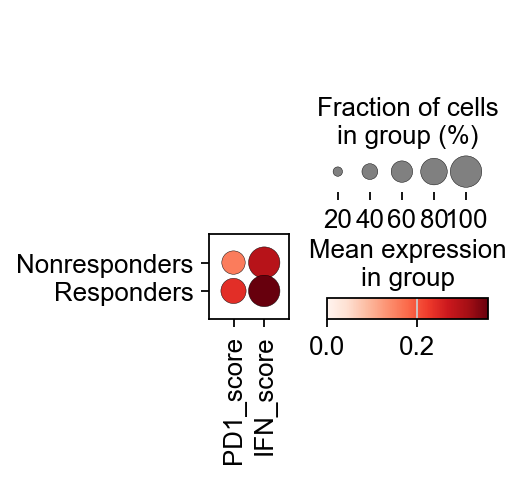

In [20]:
sc.pl.dotplot(adata_PD_T, ['PD1_score','IFN_score'],vmin=0, groupby='class')

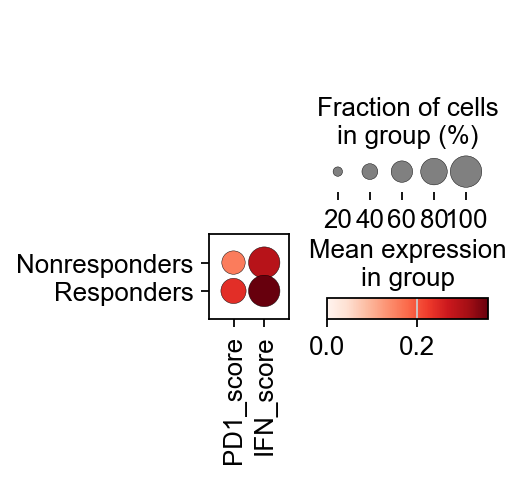

In [21]:
sc.pl.dotplot(adata_PD_T, ['PD1_score','IFN_score'],vmin=0, groupby='class')

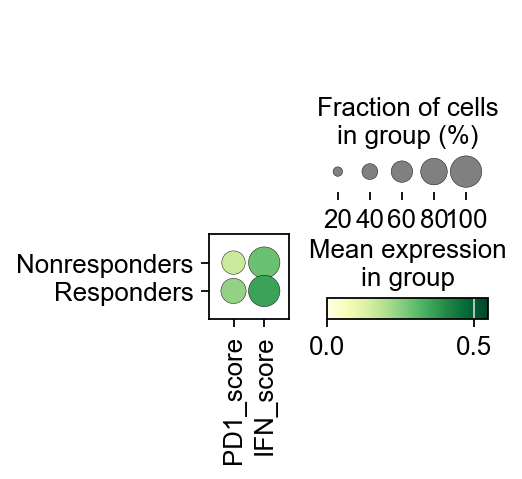

In [22]:
sc.pl.dotplot(adata_PD_T, ['PD1_score','IFN_score'],vmin=0.00,vmax=0.55,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

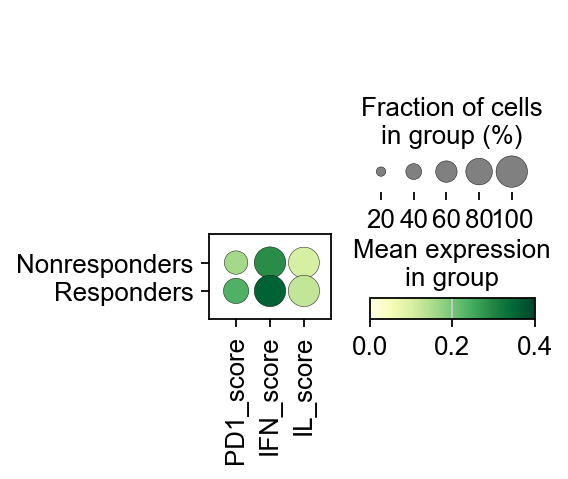

In [31]:
sc.pl.dotplot(adata_PD_T, ['PD1_score','IFN_score','IL_score'],vmin=0.00,vmax=0.4,cmap='YlGn', groupby='class', save='dotplot_PD1_patients_PD1_IFN_IL_score_response.pdf')

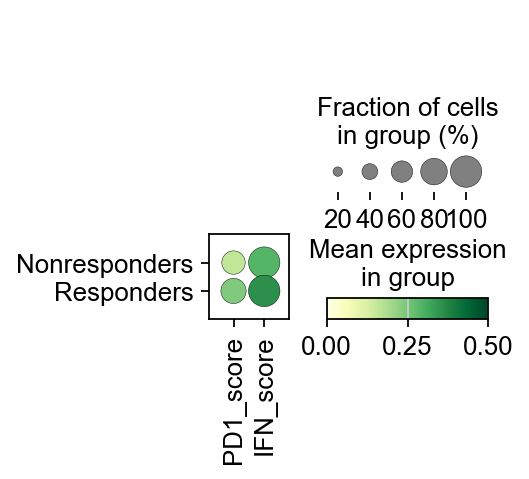

In [40]:
sc.pl.dotplot(adata_PD_T, ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='class', save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

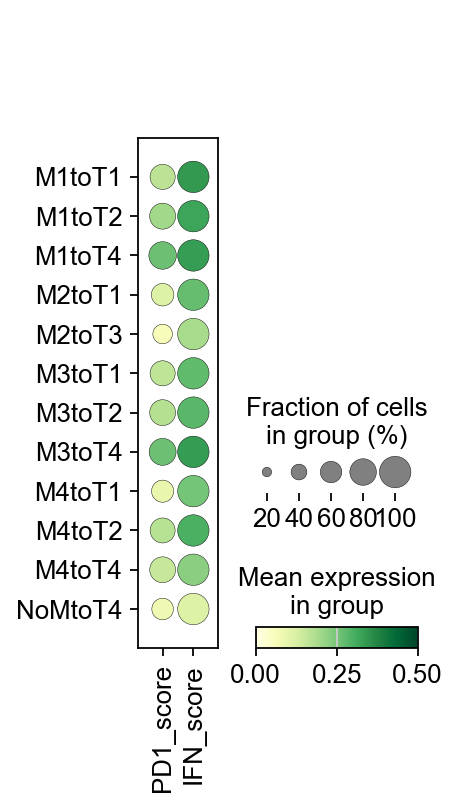

In [33]:
sc.pl.dotplot(adata_69T, ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='class', save='dotplot_PD1_patients_PD1_and_IFN_score_by_MT_class_.pdf')

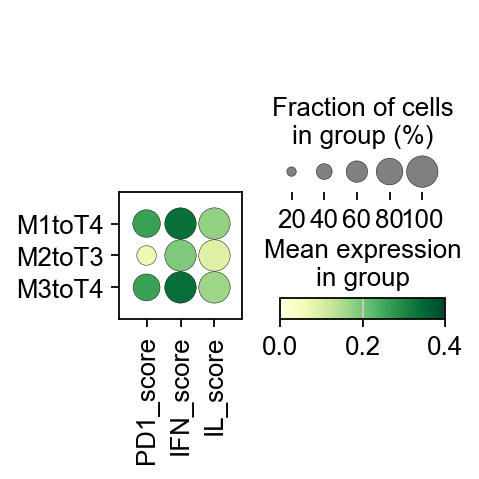

In [32]:
sc.pl.dotplot(adata_69T[adata_69T.obs['class'].isin(['M1toT4','M2toT3','M3toT4'])], ['PD1_score','IFN_score','IL_score'],vmin=0.00,vmax=0.4,cmap='YlGn', groupby='class', save='dotplot_PD1_patients_PD1_IFN_IL_score_by_MT_class_1.pdf')

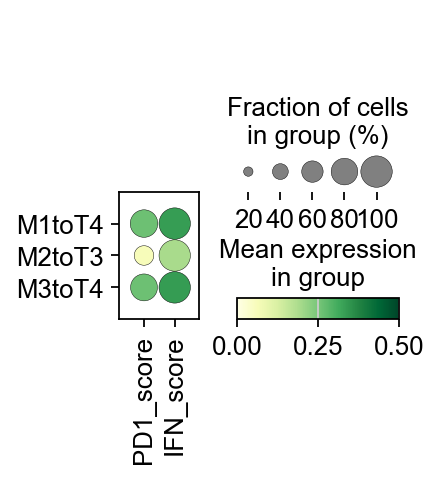

In [38]:
sc.pl.dotplot(adata_69T[adata_69T.obs['class'].isin(['M1toT4','M2toT3','M3toT4'])], ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='class', save='dotplot_PD1_patients_PD1_and_IFN_score_by_MT_class_1.pdf')

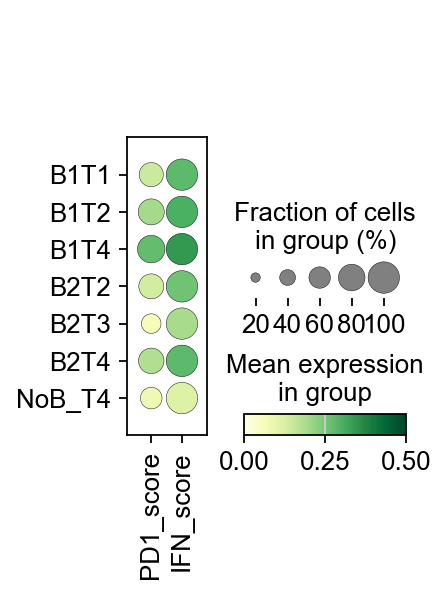

In [36]:
sc.pl.dotplot(adata_69T, ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='B_T_patient_cluster', save='dotplot_PD1_patients_PD1_and_IFN_score_by_BT_class_.pdf')

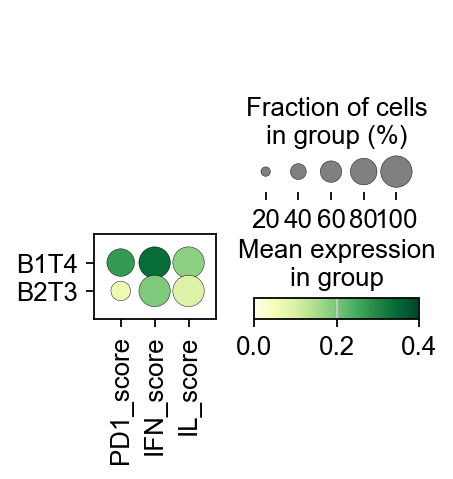

In [33]:
sc.pl.dotplot(adata_69T[adata_69T.obs['B_T_patient_cluster'].isin(['B1T4','B2T3'])], ['PD1_score','IFN_score','IL_score'],vmin=0.00,vmax=0.4,cmap='YlGn', groupby='B_T_patient_cluster', save='dotplot_PD1_patients_PD1_IFN_IL_score_by_BT_class_1.pdf')

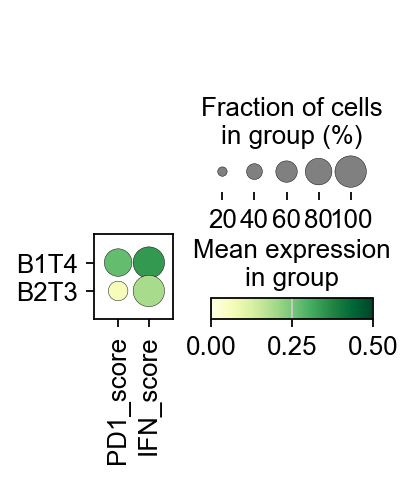

In [39]:
sc.pl.dotplot(adata_69T[adata_69T.obs['B_T_patient_cluster'].isin(['B1T4','B2T3'])], ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='B_T_patient_cluster', save='dotplot_PD1_patients_PD1_and_IFN_score_by_BT_class_1.pdf')

In [13]:
#Reference : Cell reports medicine (4, 100896, January 17, 2023)
AngiogenesisSignature = ["MYCT1",	"APOH",	"APP",	"CCND2",	"COL3A1",	"COL5A2",	"CXCL6",	"FGFR1",	"FSTL1",	"ITGAV",	"JAG1",	"JAG2",	"KCNJ8",	"LPL",	"LRPAP1",	"LUM",	"MSX1",	"NRP1",	"OLR1",	"PDGFA",	"PF4",	"PGLYRP1",	"POSTN",	"PRG2",	"PTK2",	"S100A4",	"SERPINA5",	"SLCO2A1",	"SPP1",	"STC1",	"THBD",	"TIMP1",	"TNFRSF21",	"VAV2",	"VCAN",	"VEGFA",	"VTN",	"CDH5",	"ELTD1",	"CLEC14A",	"LDB2",	"ECSCR",	"RHOJ",	"VWF",	"TIE1",	"KDR",	"ESAM",	"CD93",	"PTPRB",	"GPR116",	"SPARCL1",	"EMCN",	"ROBO4",	"ENG",	"TEK",	"SIPR1"
]

HALLMARK_ANGIOGENESIS = ["APOH",	"APP",	"CCND2",	"COL3A1",	"COL5A2",	"CXCL6",	"FGFR1",	"FSTL1",	"ITGAV",	"JAG1",	"JAG2",	"KCNJ8",	"LPL",	"LRPAP1",	"LUM",	"MSX1",	"NRP1",	"OLR1",	"PDGFA",	"PF4",	"PGLYRP1",	"POSTN",	"PRG2",	"PTK2",	"S100A4",	"SERPINA5",	"SLCO2A1",	"SPP1",	"STC1",	"THBD",	"TIMP1",	"TNFRSF21",	"VAV2",	"VCAN",	"VEGFA",	"VTN"
]

GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY =["AZGP1",	"B2M",	"CD1A",	"CD1B",	"CD1C",	"CD1D",	"CD1E",	"CD81",	"CYRIB",	"FADD",	"FBXO38",	"FOXP3",	"FZD5",	"GATA3",	"HLA-A",	"HLA-B",	"HLA-E",	"HLA-F",	"HLA-G",	"HLA-H",	"HSPD1",	"IL12A",	"IL12B",	"IL12RB1",	"IL18",	"IL18R1",	"IL1B",	"IL1R1",	"IL23A",	"IL23R",	"IL6",	"MALT1",	"MAP3K7",	"MR1",	"NECTIN2",	"NLRP3",	"P2RX7",	"PRKCZ",	"PTPRC",	"PVR",	"RSAD2",	"SASH3",	"SLC22A13",	"STX7",	"TNFSF4",	"TRAF2",	"TRAF6",	"XCL1",	"ZBTB1",	"ZP3"
]
GO_T_CELL_ACTIVATION =["ABL1",	"ADA",	"ADAM17",	"ADAM8",	"ADORA2A",	"AGER",	"AIF1",	"AIRE",	"AKT1",	"ANXA1",	"AP3B1",	"AP3D1",	"APBB1IP",	"ARG1",	"ARG2",	"ATG5",	"ATP7A",	"AZI2",	"B2M",	"BAD",	"BATF",	"BAX",	"BCL10",	"BCL11B",	"BCL2",	"BCL3",	"BCL6",	"BMP4",	"BTLA",	"BTN2A2",	"BTN3A1",	"CAMK4",	"CARD11",	"CASP3",	"CASP8",	"CAV1",	"CBFB",	"CCDC88B",	"CCL19",	"CCL2",	"CCL21",	"CCL5",	"CCND3",	"CCR2",	"CCR6",	"CCR7",	"CCR9",	"CD151",	"CD160",	"CD1C",	"CD1D",	"CD2",	"CD209",	"CD24",	"CD27",	"CD274",	"CD276",	"CD28",	"CD300A",	"CD3D",	"CD3E",	"CD3G",	"CD4",	"CD40LG",	"CD44",	"CD46",	"CD47",	"CD5",	"CD55",	"CD6",	"CD7",	"CD70",	"CD74",	"CD80",	"CD81",	"CD83",	"CD86",	"CD8A",	"CD8B",	"CDC42",	"CDH26",	"CDK6",	"CEACAM1",	"CEBPB",	"CGAS",	"CHD7",	"CLC",	"CLEC4A",	"CLEC4D",	"CLEC4E",	"CLEC4G",	"CLEC7A",	"CLECL1",	"CLPTM1",	"CORO1A",	"CR1",	"CRTAM",	"CSK",	"CTLA4",	"CTNNB1",	"CTPS1",	"CTSL",	"CXADR",	"CYLD",	"CYP26B1",	"CYRIB",	"DDOST",	"DLG1",	"DLG5",	"DLL4",	"DNAJA3",	"DOCK2",	"DOCK8",	"DPP4",	"DROSHA",	"DTX1",	"DUSP10",	"DUSP22",	"DUSP3",	"EBI3",	"EFNB1",	"EFNB2",	"EFNB3",	"EGR1",	"EGR3",	"EIF2AK4",	"ELF4",	"EOMES",	"EPO",	"ERBB2",	"F2RL1",	"FADD",	"FANCA",	"FANCD2",	"FCER1G",	"FCGR2B",	"FGL1",	"FGL2",	"FKBP1A",	"FKBP1B",	"FLOT2",	"FOXJ1",	"FOXN1",	"FOXP1",	"FOXP3",	"FUT7",	"FYN",	"FZD5",	"FZD7",	"FZD8",	"GATA3",	"GLI2",	"GLI3",	"GLMN",	"GNRH1",	"GPAM",	"GPNMB",	"GPR18",	"GPR183",	"GPR89A",	"GPR89B",	"GRAP2",	"GRB2",	"GSN",	"HAVCR2",	"HES1",	"HFE",	"HHLA2",	"HLA-A",	"HLA-DMB",	"HLA-DOA",	"HLA-DPA1",	"HLA-DPB1",	"HLA-DRB1",	"HLA-E",	"HLA-G",	"HLX",	"HMGB1",	"HSH2D",	"HSPD1",	"HSPH1",	"ICAM1",	"ICOS",	"ICOSLG",	"IDO1",	"IFNA1",	"IFNA10",	"IFNA13",	"IFNA14",	"IFNA16",	"IFNA17",	"IFNA2",	"IFNA21",	"IFNA4",	"IFNA5",	"IFNA6",	"IFNA7",	"IFNA8",	"IFNB1",	"IFNE",	"IFNG",	"IFNK",	"IFNL1",	"IFNW1",	"IGF1",	"IGF2",	"IGFBP2",	"IHH",	"IL10",	"IL12A",	"IL12B",	"IL12RB1",	"IL15",	"IL18",	"IL18R1",	"IL1A",	"IL1B",	"IL1RL2",	"IL2",	"IL20RB",	"IL21",	"IL23A",	"IL23R",	"IL27",	"IL27RA",	"IL2RA",	"IL36B",	"IL4",	"IL4R",	"IL6",	"IL6ST",	"IL7",	"IL7R",	"INS",	"IRF1",	"IRF4",	"ITGAL",	"ITK",	"ITPKB",	"JAG2",	"JAK3",	"JAML",	"JMJD6",	"KAT2A",	"KDELR1",	"KIF13B",	"KIT",	"KLRC4-KLRK1",	"KLRK1",	"LAG3",	"LAT",	"LAX1",	"LCK",	"LCP1",	"LEF1",	"LEP",	"LEPR",	"LFNG",	"LGALS1",	"LGALS3",	"LGALS7B",	"LGALS9",	"LGALS9B",	"LGALS9C",	"LIG4",	"LILRB1",	"LILRB2",	"LILRB4",	"LMBR1L",	"LMO1",	"LOXL3",	"LRRC32",	"LY9",	"LYN",	"MAD1L1",	"MAFB",	"MALT1",	"MAP3K8",	"MAPK8IP1",	"MARCHF7",	"MDK",	"METTL3",	"MICA",	"MICB",	"MIR181C",	"MIR21",	"MIR27A",	"MIR30B",	"MR1",	"MSN",	"MTOR",	"MYB",	"MYH9",	"NCAPH2",	"NCK1",	"NCK2",	"NCKAP1L",	"NCSTN",	"NDFIP1",	"NEDD4",	"NFATC2",	"NFKBID",	"NFKBIZ",	"NHEJ1",	"NKAP",	"NKX2-3",	"NLRC3",	"NLRP3",	"NOD2",	"NRARP",	"P2RX7",	"PAG1",	"PAK1",	"PAK2",	"PAK3",	"PATZ1",	"PAWR",	"PAX1",	"PCK1",	"PDCD1",	"PDCD1LG2",	"PDE5A",	"PDPK1",	"PELI1",	"PIK3CA",	"PIK3CD",	"PIK3CG",	"PIK3R1",	"PIK3R6",	"PKNOX1",	"PLA2G2D",	"PLA2G2F",	"PNP",	"PPP3CA",	"PPP3CB",	"PRDM1",	"PRDX2",	"PRELID1",	"PREX1",	"PRKAR1A",	"PRKCQ",	"PRKCZ",	"PRKDC",	"PRNP",	"PRR7",	"PSAP",	"PSEN1",	"PSMB10",	"PSMB11",	"PTGER4",	"PTPN11",	"PTPN2",	"PTPN22",	"PTPN6",	"PTPRC",	"PYCARD",	"RAB27A",	"RAB29",	"RABL3",	"RAC1",	"RAC2",	"RAG1",	"RAG2",	"RARA",	"RASAL3",	"RASGRP1",	"RC3H1",	"RC3H2",	"RELB",	"RHOA",	"RHOH",	"RIPK2",	"RIPK3",	"RIPOR2",	"RORA",	"RORC",	"RPS3",	"RSAD2",	"RUNX1",	"RUNX2",	"RUNX3",	"SART1",	"SASH3",	"SATB1",	"SCGB1A1",	"SCRIB",	"SDC4",	"SELENOK",	"SEMA4A",	"SFTPD",	"SH3RF1",	"SHH",	"SIRPA",	"SIRPB1",	"SIRPG",	"SIT1",	"SLA2",	"SLAMF6",	"SLC11A1",	"SLC46A2",	"SLC7A1",	"SMAD3",	"SMAD7",	"SOCS1",	"SOCS5",	"SOCS6",	"SOD1",	"SOS1",	"SOX12",	"SOX13",	"SOX4",	"SP3",	"SPINK5",	"SPN",	"SPTA1",	"SRC",	"SRF",	"STAT3",	"STAT5B",	"STAT6",	"STK11",	"STOML2",	"SYK",	"TARM1",	"TBX21",	"TCF7",	"TCIRG1",	"TESPA1",	"TFRC",	"TGFBR2",	"THEMIS",	"THY1",	"TIGIT",	"TMEM131L",	"TMEM98",	"TMIGD2",	"TNFAIP8L2",	"TNFRSF13C",	"TNFRSF14",	"TNFRSF18",	"TNFRSF1B",	"TNFRSF21",	"TNFRSF4",	"TNFSF11",	"TNFSF13B",	"TNFSF14",	"TNFSF18",	"TNFSF4",	"TNFSF8",	"TNFSF9",	"TOX",	"TP53",	"TRAF6",	"TREML2",	"TREX1",	"TSC1",	"TWSG1",	"VAV1",	"VCAM1",	"VNN1",	"VSIG4",	"VSIR",	"VTCN1",	"WAS",	"WNT1",	"WNT4",	"XBP1",	"XCL1",	"YES1",	"ZAP70",	"ZBTB1",	"ZBTB16",	"ZBTB7B",	"ZC3H12A",	"ZC3H8",	"ZEB1",	"ZFP36L1",	"ZFP36L2",	"ZFPM1",	"ZMIZ1",	"ZNF683",	"ZP3",	"ZP4"
 ]
GO_POSITIVE_T_CELL_SELECTION =["BATF",	"BCL11B",	"BCL2",	"CD3D",	"CD3E",	"CD3G",	"CD74",	"CTSL",	"CYLD",	"DOCK2",	"FOXN1",	"FOXP3",	"IL12B",	"IL12RB1",	"IL23A",	"IL23R",	"IL6",	"IRF4",	"ITPKB",	"LOXL3",	"LY9",	"MTOR",	"PTPN2",	"PTPRC",	"SHH",	"SLAMF6",	"SPN",	"SRF",	"STAT3",	"STAT6",	"STK11",	"TBX21",	"THEMIS",	"TOX",	"ZAP70",	"ZFPM1"
]
GO_T_CELL_MEDIATED_CYTOTOXICITY =["AGER",	"AZGP1",	"B2M",	"CD1A",	"CD1B",	"CD1C",	"CD1D",	"CD1E",	"CEACAM1",	"CTSC",	"CTSH",	"CYRIB",	"EMP2",	"FADD",	"FCGR2B",	"GZMM",	"HLA-A",	"HLA-B",	"HLA-E",	"HLA-F",	"HLA-G",	"HLA-H",	"HPRT1",	"IL12A",	"IL12B",	"IL12RB1",	"IL23A",	"IL23R",	"IL7R",	"LILRB1",	"MICA",	"MR1",	"NECTIN2",	"P2RX7",	"PPP3CB",	"PRF1",	"PTPRC",	"PVR",	"RAB27A",	"RIPK3",	"SLC22A13",	"STX7",	"TSTA3",	"XCL1"
 ]

In [15]:
sc.tl.score_genes(adata_PD_T,AngiogenesisSignature, score_name='AngiogenesisSignature')
sc.tl.score_genes(adata_PD_T,HALLMARK_ANGIOGENESIS, score_name='HALLMARK_ANGIOGENESIS')
sc.tl.score_genes(adata_PD_T,GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY, score_name='GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY')
sc.tl.score_genes(adata_PD_T,GO_T_CELL_ACTIVATION, score_name='GO_T_CELL_ACTIVATION')
sc.tl.score_genes(adata_PD_T,GO_POSITIVE_T_CELL_SELECTION, score_name='GO_POSITIVE_T_CELL_SELECTION')
sc.tl.score_genes(adata_PD_T,GO_T_CELL_MEDIATED_CYTOTOXICITY, score_name='GO_T_CELL_MEDIATED_CYTOTOXICITY')

sc.tl.score_genes(adata_69T,AngiogenesisSignature, score_name='AngiogenesisSignature')
sc.tl.score_genes(adata_69T,HALLMARK_ANGIOGENESIS, score_name='HALLMARK_ANGIOGENESIS')
sc.tl.score_genes(adata_69T,GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY, score_name='GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY')
sc.tl.score_genes(adata_69T,GO_T_CELL_ACTIVATION, score_name='GO_T_CELL_ACTIVATION')
sc.tl.score_genes(adata_69T,GO_POSITIVE_T_CELL_SELECTION, score_name='GO_POSITIVE_T_CELL_SELECTION')
sc.tl.score_genes(adata_69T,GO_T_CELL_MEDIATED_CYTOTOXICITY, score_name='GO_T_CELL_MEDIATED_CYTOTOXICITY')

computing score 'AngiogenesisSignature'
    finished: added
    'AngiogenesisSignature', score of gene set (adata.obs).
    549 total control genes are used. (0:00:00)
computing score 'HALLMARK_ANGIOGENESIS'
    finished: added
    'HALLMARK_ANGIOGENESIS', score of gene set (adata.obs).
    449 total control genes are used. (0:00:00)
computing score 'GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY'
    finished: added
    'GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY', score of gene set (adata.obs).
    801 total control genes are used. (0:00:00)
computing score 'GO_T_CELL_ACTIVATION'
    finished: added
    'GO_T_CELL_ACTIVATION', score of gene set (adata.obs).
    1172 total control genes are used. (0:00:00)
computing score 'GO_POSITIVE_T_CELL_SELECTION'
    finished: added
    'GO_POSITIVE_T_CELL_SELECTION', score of gene set (adata.obs).
    697 total control genes are used. (0:00:00)
computing score 'GO_T_CELL_MEDIATED_CYTOTOXICITY'
    finished: added
    'GO_T_CELL_MEDI

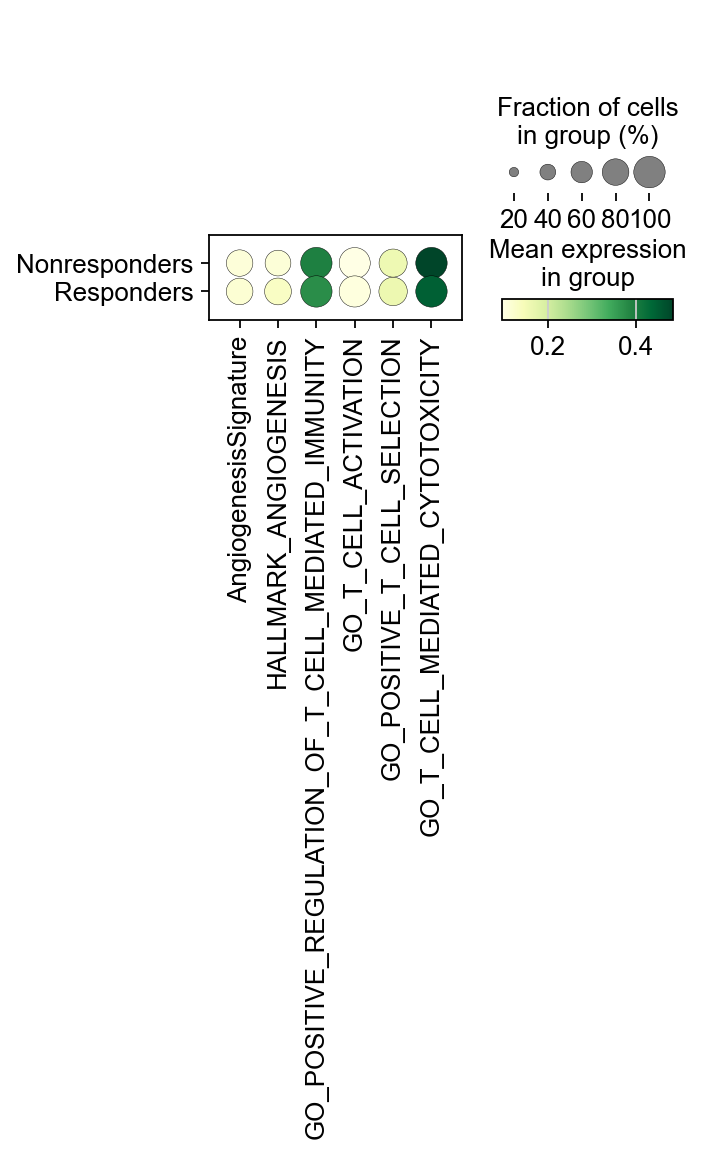

In [20]:
sc.pl.dotplot(adata_PD_T, ['AngiogenesisSignature','HALLMARK_ANGIOGENESIS','GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY',
                           'GO_T_CELL_ACTIVATION','GO_POSITIVE_T_CELL_SELECTION','GO_T_CELL_MEDIATED_CYTOTOXICITY'],cmap='YlGn', groupby='response',
             )#save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

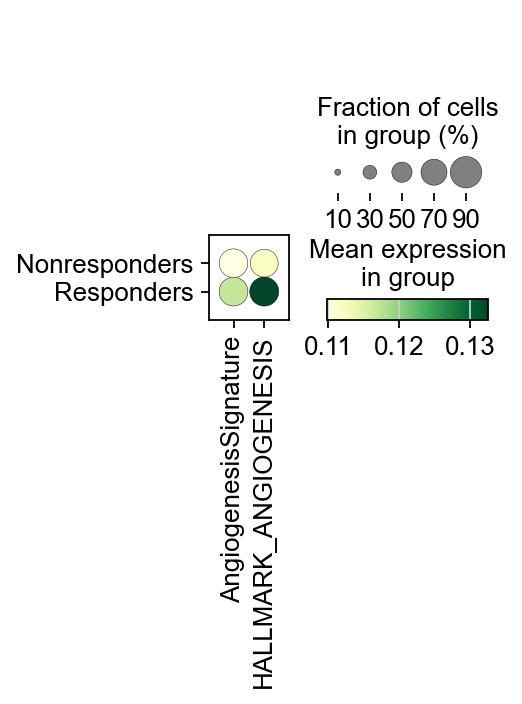

In [21]:
sc.pl.dotplot(adata_PD_T, ['AngiogenesisSignature','HALLMARK_ANGIOGENESIS'],cmap='YlGn', groupby='response',
             )#save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

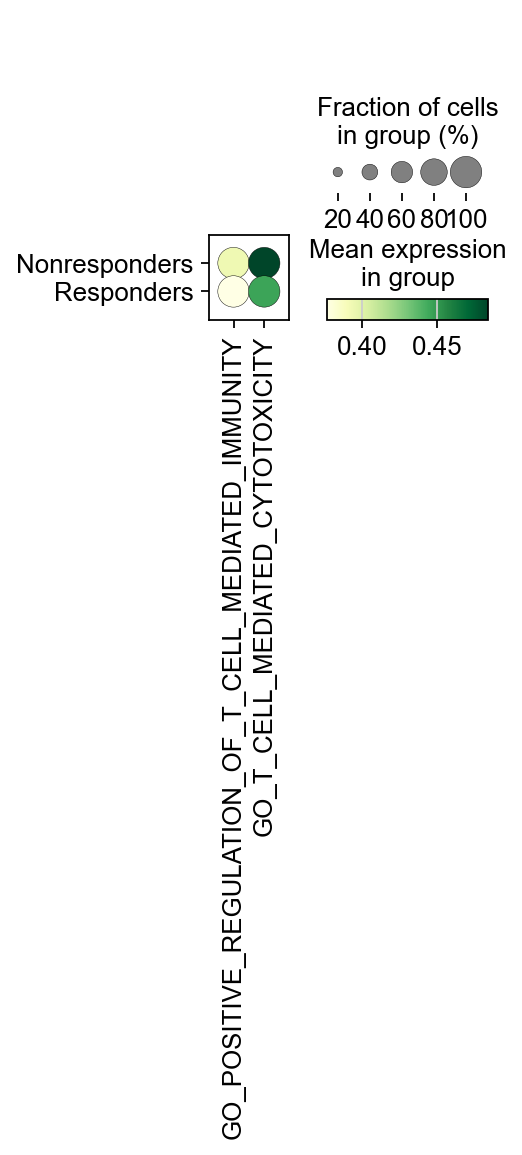

In [22]:
sc.pl.dotplot(adata_PD_T, ['GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY','GO_T_CELL_MEDIATED_CYTOTOXICITY'],cmap='YlGn', groupby='response',
             )#save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

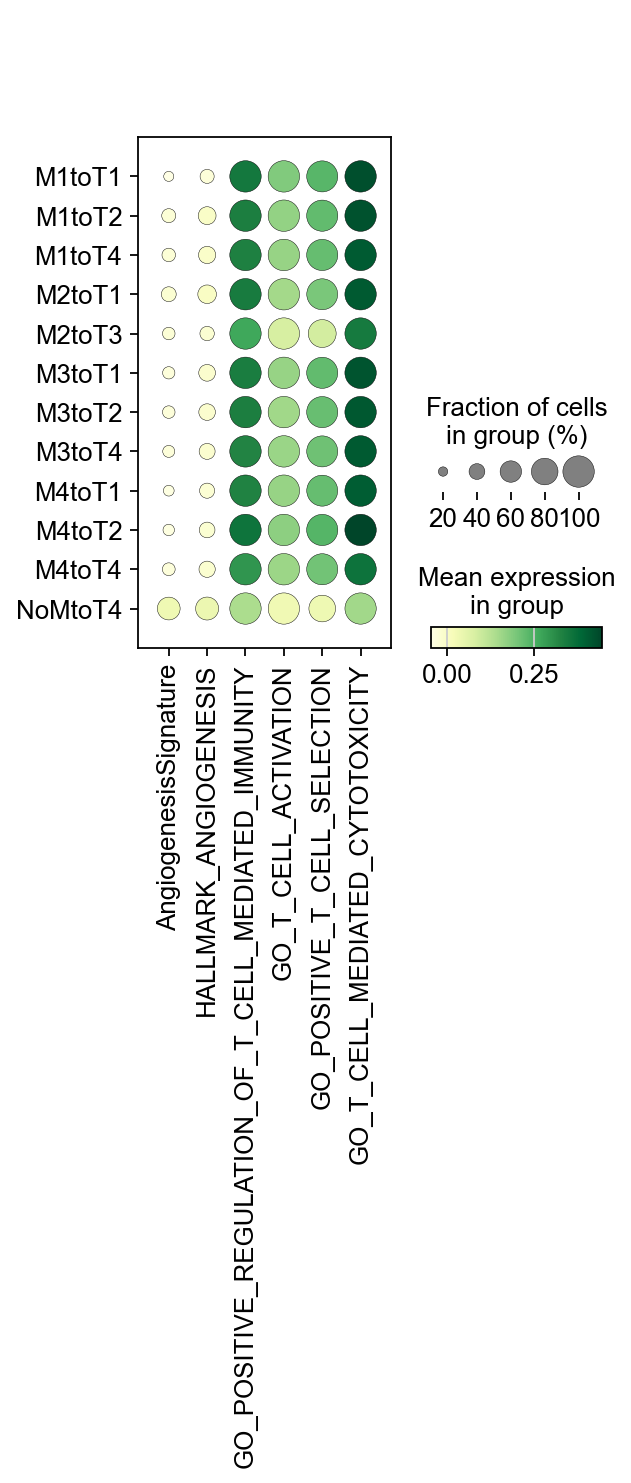

In [24]:
sc.pl.dotplot(adata_69T, ['AngiogenesisSignature','HALLMARK_ANGIOGENESIS','GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY',
                           'GO_T_CELL_ACTIVATION','GO_POSITIVE_T_CELL_SELECTION','GO_T_CELL_MEDIATED_CYTOTOXICITY'],cmap='YlGn', groupby='class')
#, save='dotplot_PD1_patients_PD1_and_IFN_score_by_MT_class_.pdf')

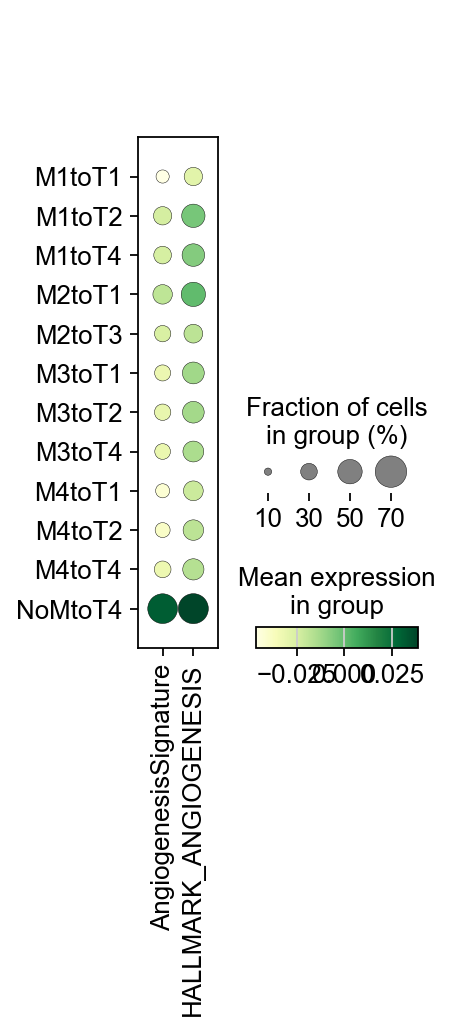

In [31]:
sc.pl.dotplot(adata_69T, ['AngiogenesisSignature','HALLMARK_ANGIOGENESIS'],cmap='YlGn', groupby='class')
#, save='dotplot_PD1_patients_PD1_and_IFN_score_by_MT_class_.pdf')

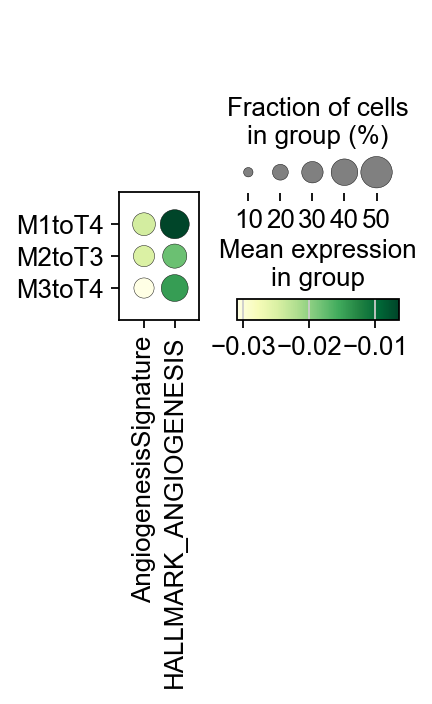

In [35]:
sc.pl.dotplot(adata_69T[adata_69T.obs['class'].isin(['M1toT4','M2toT3','M3toT4'])], ['AngiogenesisSignature','HALLMARK_ANGIOGENESIS'],
             cmap='YlGn', groupby='class', save='_Angiogenic_score_by_MT_class_1.pdf')

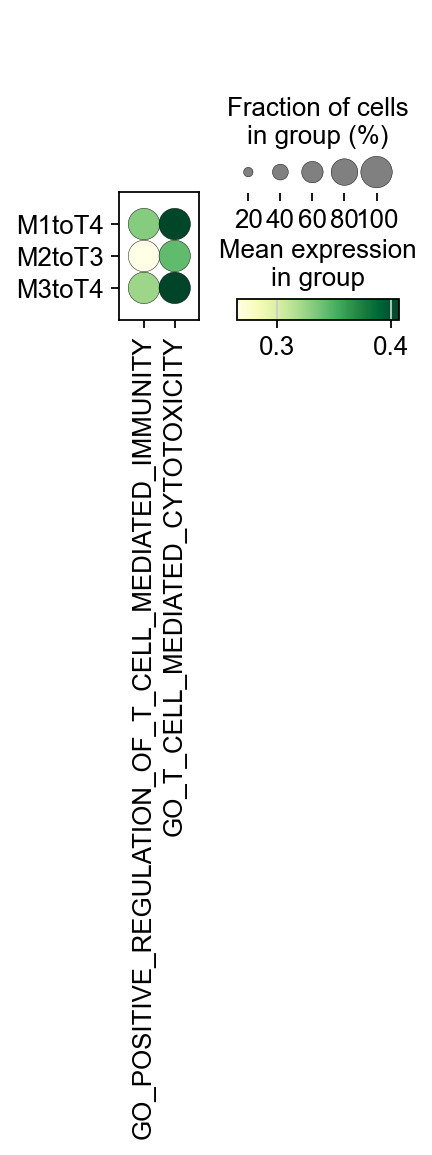

In [36]:
sc.pl.dotplot(adata_69T[adata_69T.obs['class'].isin(['M1toT4','M2toT3','M3toT4'])], ['GO_POSITIVE_REGULATION_OF_T_CELL_MEDIATED_IMMUNITY','GO_T_CELL_MEDIATED_CYTOTOXICITY'],
             cmap='YlGn', groupby='class')#, save='_Angiogenic_score_by_MT_class_1.pdf')

# Check

# Only with responder 1

In [ ]:
#adata_PD_T.obs['patient']

In [ ]:
#adata_PD_T1 = adata_PD_T[adata_PD_T.obs['patient']=='responder_3']
#adata_PD_T1

# only with 3 class

In [ ]:
adata_69T_1 = adata_69T[adata_69T.obs['class'].isin(['M1toT4','M2toT3','M3toT4'])]

In [ ]:
sc.pl.dotplot(adata_69T_1, ['PD1_score','IFN_score'],vmin=0.00,vmax=0.5,cmap='YlGn', groupby='class', save='dotplot_mat4_mbt2_mct4_PD1_and_IFN_score.pdf')

In [ ]:
sc.tl.rank_genes_groups(adata_69T, 'class', method='wilcoxon', key_added='rank_MtoT')

In [ ]:
result_2_3 = adata_69T.uns['rank_MtoT']
groups = result_2_3['names'].dtype.names
pval_table_2_3 = pd.DataFrame(
            {group + '_' + key[:2]: result_2_3[key][group]
            for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
pval_table_2_3
pval_table_2_3.to_csv("F:/Ko/PD-1_responders/69_patient_T_cell_MtoT_class_markergene_01-13-23.csv",
                 sep=',', na_rep='', float_format=None, columns=None, header=True, 
                 index=True, index_label=None, mode='w', encoding=None, compression='infer', 
                 quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None)

In [ ]:
#100 genes/each class

MaT1_gene=["SPP1"	"AK4",	"RCAN2",	"MB21D2",	"DPP4",	"CALHM6",	"POLQ",	"PIK3R6",	"RRM2",	"LINC00243",	"PKMYT1",	"TROAP",	"MND1",	"SHCBP1",	"DLGAP5",	"BIRC5",	"CDCA3",	"MYBL2",	"IL1RN",	"MCM10",	"DIAPH3",	"PLEK",	"ZBTB16",	"POC1A",	"SKA1",	"CDCA7",	"PBK",	"CDCA5",	"CDC20",	"CDC45",	"AURKB",	"HIST1H1B",	"IL1B",	"PRR11",	"IL12RB2",	"SPC24",	"HDGFL3",	"PLK1",	"MTFR2",	"TTK",	"TK1",	"ZWINT",	"FLOT1",	"SLC19A1",	"TYMS",	"CDC6",	"LOXL1-AS1",	"RAD51",	"CD68",	"KIF2C",	"CDCA7L",	"ADGRG3",	"GTSE1",	"MELK",	"MKI67",	"TXK",	"GINS2",	"SLC29A1",	"RASAL1",	"HDAC4-AS1",	"CCNA2",	"POLR2J2",	"FOXM1",	"DTL",	"CENPW",	"HIST1H2AH",	"KIF14",	"TOP2A",	"CIT",	"KIF15",	"UHRF1",	"CDCA8",	"UBE2C",	"PLK4",	"ORC6",	"IL1R2",	"ESCO2",	"ANKRD36B",	"SKA3",	"PCLAF",	"SPC25",	"CLEC7A",	"LIMK2",	"SGO1",	"SREBF2-AS1",	"ANLN",	"CD69",	"LINC00598",	"RPS26",	"TRIM47",	"HJURP",	"IL15RA",	"PIM1",	"MAP3K20",	"PAICS",	"CAPN12",	"NUF2",	"HIST1H1D",	"IL2RA",	"SDHAF4",
]
MaT3_gene=["FBLN5"	"NME4",	"CXCR5",	"PTPN13",	"LGMN",	"NFIA",	"ZBTB10",	"PTPRM",	"NR3C2",	"FOSB",	"SPDYA",	"MTRNR2L12",	"CYB561",	"PASK",	"DRAIC",	"STX17-AS1",	"FRMD4A",	"CMTM8",	"MX2",	"EGR1",	"SMCO4",	"FOS",	"ACTN1",	"IGFBP4",	"TC2N",	"SOCS1",	"SAMD12",	"TSC22D2",	"NR4A2",	"NR4A3",	"PTGER2",	"ARMH1",	"IFIT1",	"IL6R",	"TCF7",	"MARCKSL1",	"CD79A",	"UST",	"AC093010.2",	"LY96",	"S1PR1",	"GNG4",	"APBA2",	"CSRNP1",	"JUNB",	"SOCS3",	"TNF",	"FAM43A",	"ANK3",	"BTG2",	"TUBB4B",	"ADRB2",	"BRD2",	"CHI3L2",	"FAM53C",	"AL499604.1",	"TUBB2A",	"KLF3",	"LINC00892",	"LDLRAP1",	"DDX3X",	"CD300A",	"SERTAD1",	"CD40LG",	"CYP4V2",	"ITGB2-AS1",	"PCSK1N",	"KLRG1",	"IFIT2",	"NAF1",	"MCUB",	"ERAP2",	"ST8SIA1",	"TAGAP",	"CMPK2",	"SREBF1",	"AP3M2",	"ICA1",	"ST6GAL1",	"PXN",	"FCRL3",	"ZFP36",	"SORL1",	"FCMR",	"GSE1",	"SLC9A9",	"TLE4",	"AIM2",	"EPHA4",	"LINC00910",	"CD6",	"ZNF296",	"RASGRP2",	"PTGER4",	"ENOX2",	"CEP128",	"CD4",	"CXorf40A",	"CHMP1B",	"SUMF1",
]
MaT4_gene=["HSPA6"	"SERPINH1",	"HSPA1B",	"HSPA1A",	"BAG3",	"AC022182.2",	"SERPINE1",	"MOXD1",	"RHOB",	"PRRG4",	"HMOX1",	"ANLN",	"ZFAND2A",	"HSPB1",	"DNAJB1",	"DNAJA4",	"HSPA1L",	"DNAJB4",	"CCR1",	"CHRNA5",	"MUC12",	"CCL3",	"CISH",	"GNLY",	"AFAP1L2",	"RASD1",	"ID3",	"CDKN2C",	"ATF3",	"HIST1H2BH",	"RND1",	"FAM111B",	"SGK1",	"DBP",	"LINC01480",	"ITGA2",	"GOLM1",	"PIP5K1B",	"NFKBIE",	"TNFSF14",	"RGS16",	"JUN",	"CD38",	"AC018362.1",	"SEMA7A",	"DCLRE1B",	"RHEBL1",	"CSF2",	"NR4A1",	"IER5L",	"SETBP1",	"FKBP4",	"UBE2C",	"KBTBD8",	"NCAPG",	"MLLT11",	"GBP3",	"EDARADD",	"HSPD1",	"HSPE1",	"CSF1",	"AL627171.2",	"KLRC2",	"TSC22D1",	"WWTR1",	"CGAS",	"PTPRK",	"SERP2",	"PPP1R15A",	"CCNA2",	"ENGASE",	"HSPH1",	"DTL",	"KLHL25",	"CKAP2L",	"HIST1H2BJ",	"FAM3C",	"HIST1H3H",	"CTNNAL1",	"CCL4",	"APTR",	"CIP2A",	"HSP90AA1",	"HSPA2",	"CACYBP",	"MYO1E",	"CRIM1",	"CXCL13",	"USPL1",	"LRRC28",	"PTPN6",	"HAVCR2",	"ASPM",	"GZMA",	"CLSPN",	"CCL5",	"TNFSF4",	"NECTIN3",	"KLRC1",	"IER3",
]
MbT1_gene=["RMRP"	"RASGEF1B",	"BCOR",	"RPS29",	"PAX8-AS1",	"TNFSF9",	"LMNA",	"RGCC",	"LAIR2",	"PLCB1",	"AC007952.4",	"AL627171.2",	"FOS",	"MT1X",	"TNF",	"NDUFB1",	"CRIP1",	"FOSB",	"ATP1B1",	"PET100",	"FANK1",	"MT2A",	"MYADM",	"RPS27",	"RPL38",	"ANXA1",	"HIST1H4C",	"ATP5ME",	"ATP8A1",	"RPS21",	"GPR183",	"VIM",	"UTS2",	"NCF1",	"TOB1",	"RPL37A",	"NDUFA3",	"TUBB2A",	"JUNB",	"A1BG",	"THEM4",	"ZFP36",	"KLF6",	"RPL37",	"GLRX",	"CD83",	"CXCR4",	"RPL39",	"RILPL2",	"S100A4",	"ROMO1",	"S100A10",	"PNRC1",	"HLA-B",	"ARL4A",	"TMA7",	"KLF2",	"GZMK",	"CD52",	"RPS28",	"DPM3",	"CADM1",	"WDR74",	"TC2N",	"ITGB2",	"NFKBIA",	"IL7R",	"SNHG1",	"TAGLN2",	"PLP2",	"RNF145",	"TNFAIP3",	"NMRK1",	"UBE2S",	"ATP5F1E",	"ITGB1",	"LRRC8C",	"CD44",	"CYBA",	"PDCD5",	"DENND4A",	"ATP5MD",	"S100A11",	"NIBAN1",	"SOCS1",	"AHNAK",	"RPL41",	"POLR2L",	"RPL36A",	"RPL22L1",	"CD99",	"SLC38A2",	"EIF5A",	"TSC22D3",	"AAK1",	"SNHG6",	"SLC2A3",	"RPL36",	"GPR65",	"LINC01619",
]
MbT2_gene=["IGHG4"	"IL6",	"IGHG3",	"CXCL1",	"RPS10",	"IGLC2",	"SPARC",	"AC092338.3",	"CXCL3",	"CCL2",	"IGLC3",	"IGKC",	"C1orf56",	"TPSB2",	"AC015871.7",	"CXCL2",	"IGHA1",	"AL121933.2",	"AC009107.2",	"MGST1",	"IGLC1",	"IDO1",	"CSTA",	"CXCL8",	"AC093673.1",	"INHBA",	"GPM6B",	"SULF2",	"TNFAIP6",	"SLC16A4",	"SNRPD3",	"TFPI",	"PHKG1",	"AC016831.5",	"FN1",	"AC114760.2",	"S100A2",	"AL162390.1",	"C11orf96",	"AL022311.1",	"AC104695.4",	"S100A14",	"DYNLRB1",	"S100A9",	"JCHAIN",	"F8A1",	"FAM122A",	"COL1A1",	"FAM215B",	"AC007216.3",	"IGHA2",	"AC245452.1",	"RPS17",	"S100A8",	"GGPS1",	"CYP3A5",	"UPK3BL1",	"EBLN2",	"KRT8",	"PTGS2",	"S100P",	"HNRNPA1L2",	"RPL27A",	"GPR82",	"KTI12",	"RPS20",	"CFD",	"AC058791.1",	"IGHG1",	"LINC-PINT",	"RPL13A",	"LINC00672",	"SND1-IT1",	"OSBPL10",	"ADM",	"ANGPT2",	"APOE",	"ERV3-1",	"RPS29",	"CCZ1",	"IGFBP7",	"IGHM",	"IGHG2",	"AC002558.3",	"AC004951.1",	"AC133644.2",	"CST3",	"AL133243.3",	"NAA10",	"NCMAP-DT",	"APOC1",	"RPL7",	"CLDN15",	"AC006141.1",	"IGFBP6",	"CTTN",	"AC092683.1",	"Z82215.1",	"HNRNPA1P48",	"LINC00685",
]
MbT3_gene=["MT1E"	"MT1X",	"MT2A",	"MT1G",	"MT1F",	"SLC30A1",	"LMNA",	"TUBB2A",	"SVIL",	"VASH1",	"KLF2",	"CRIP2",	"MYBL1",	"YRDC",	"NBL1",	"PLCB1",	"TLNRD1",	"RGCC",	"ANXA1",	"S1PR1",	"VIM",	"AC068587.4",	"CCDC173",	"PPP1R13B",	"RAB22A",	"MYADM",	"BCL3",	"SLCO3A1",	"TSPAN2",	"EPHA4",	"SLC12A7",	"TUBA1A",	"ORAI1",	"DSE",	"TAGLN2",	"ANK3",	"PLAUR",	"YPEL5",	"FXYD2",	"ZFP36",	"MLF1",	"MIR22HG",	"ANTXR2",	"LSR",	"TP53INP2",	"RRP12",	"TGFB1",	"AC016831.7",	"TSR3",	"SEMA4A",	"FXYD7",	"RRAGC",	"TUBB4B",	"BOD1",	"ARL4A",	"RARA",	"CCNQ",	"PRXL2C",	"NBPF19",	"CEBPD",	"ATP2B1",	"S100A10",	"CCR7",	"SLC10A3",	"CEBPB",	"EVA1C",	"CDKN1A",	"BIK",	"CRIP1",	"MZT2B",	"UBE2S",	"ARF6",	"PDXK",	"RNF220",	"NSMCE3",	"SFPQ",	"RPS2",	"AHNAK",	"PDCD4",	"ISCA1",	"GSPT1",	"LTB",	"PDXDC1",	"CDC34",	"LINC01128",	"CBR3",	"CAMK1D",	"RFX2",	"LACTB",	"BNIP3",	"TMEM185B",	"TLE4",	"BBC3",	"KLF3",	"ODC1",	"IL7R",	"HSPA8",	"HSPH1",	"TXNL4A",	"JAZF1",
]
McT1_gene=["RBFOX2"	"STEAP1B",	"APOO",	"GAREM1",	"PRSS21",	"FKBP2",	"MT1G",	"PCSK1N",	"POLR2J2",	"U2AF1",	"PLEKHA7",	"LINC00239",	"GNG8",	"MT1X",	"DRAIC",	"MT1E",	"THEMIS2",	"CBWD5",	"FANK1",	"PCBP3",	"ADAM12",	"FLVCR2",	"ADTRP",	"IL1R1",	"IL1R2",	"FCGR3A",	"ATP1B1",	"MAL",	"CCR7",	"FOXP3",	"TBC1D8",	"ICA1",	"CCR6",	"COL18A1",	"C11orf98",	"HIGD1A",	"LAIR2",	"EPHX2",	"MT2A",	"ACP6",	"IL6R",	"RTKN2",	"LINC01814",	"RAB37",	"ICAM2",	"MT1F",	"IFITM1",	"FCMR",	"TNFRSF4",	"GZMM",	"RIC3",	"MATR3-1",	"SELL",	"GPR35",	"ZNF100",	"BLM",	"EBI3",	"LINC00861",	"GNG4",	"CXCR5",	"ACOT2",	"GGT7",	"LY75",	"SATB1",	"F5",	"PASK",	"SPOCK2",	"IZUMO4",	"AC245407.2",	"RASGEF1B",	"FBLN7",	"ZFP36",	"PBX4",	"NINJ1",	"LINC00649",	"CD28",	"FAM177A1",	"MIR4435-2HG",	"PLCL1",	"CMTM8",	"AL118516.1",	"AC017002.3",	"MLF1",	"ACTB",	"LAMP3",	"CSAD",	"CD200",	"SETD7",	"JUNB",	"ARHGAP31",	"ADAT2",	"IKZF2",	"PIM2",	"TAGLN2",	"TRAF4",	"LMNA",	"TCP11L2",	"DPH1",	"ALDOA",	"KLRG1",
]
McT3_gene=["CAV1"	"ZBTB46",	"ENC1",	"DTX1",	"MMP23B",	"VIPR2",	"SMARCD3",	"CHI3L2",	"IGLV3-1",	"HES4",	"LHFPL6",	"QPRT",	"CHPT1",	"DRAIC",	"FRMD4A",	"ST8SIA1",	"GZMK",	"B3GNT5",	"CXCR5",	"NSMCE3",	"NR4A2",	"ATL1",	"SOX5",	"STX17-AS1",	"NR4A3",	"DKK3",	"HIC1",	"CHRNE",	"ZDBF2",	"ST6GALNAC3",	"ZNF331",	"CEMIP2",	"SIAH2",	"CHKA",	"PTK2",	"YRDC",	"CYTH3",	"ARMH1",	"STAG3",	"ZBED2",	"PNRC1",	"RNF144A",	"TNFSF9",	"RHPN1",	"GPR18",	"AIF1",	"LANCL2",	"RAB37",	"KLF2",	"USP36",	"POU2AF1",	"UST",	"BCL3",	"PCBP3",	"CTH",	"CCL3L1",	"CRTAM",	"FRAT2",	"TSHZ2",	"TP53INP2",	"BCL11B",	"CDHR3",	"CD200",	"MAP2K4",	"GPR15",	"PER1",	"FGFR1",	"SFPQ",	"ADAMTS17",	"ASAP1",	"ADAMTSL4-AS1",	"IGFBP4",	"PGAP1",	"TC2N",	"AC020659.1",	"SELENOO",	"YPEL5",	"NR3C1",	"SEC14L2",	"PTPRM",	"FHIT",	"DUSP2",	"PDCD7",	"RGS13",	"AL021707.1",	"BTG1",	"PHLDB3",	"P2RY8",	"FAM117B",	"SLC16A7",	"MARCKSL1",	"THBS1",	"LYPD3",	"ZHX2",	"PPP1R16B",	"CCDC138",	"AMPD3",	"RAB34",	"ZXDC",	"BCAT1",
]
McT4_gene=["IGLV3-1"	"PDLIM4",	"ETV1",	"LINC02446",	"IFITM10",	"CD9",	"IFI44L",	"GZMB",	"CXCL13",	"DBN1",	"HLA-DQA1",	"TNS3",	"LRRN3",	"CMPK2",	"DMTN",	"MYO7A",	"WIPF3",	"TSPAN13",	"ARHGEF5",	"PAX8-AS1",	"AC022126.1",	"RSAD2",	"MX1",	"TNFSF4",	"PLPP1",	"IFI6",	"RGS13",	"TMIGD2",	"PPP1R14B",	"CD86",	"OAS1",	"AC243829.4",	"CSF1",	"LINC00339",	"ZFHX3",	"PCBP1",	"ATP8B4",	"SRGAP3",	"LINC01358",	"C3orf14",	"DDX60",	"AL136454.1",	"IFIT1",	"QPCT",	"SOX4",	"AC020659.1",	"HLA-DRA",	"OAS3",	"USP18",	"AL606807.1",	"CTSW",	"VCAM1",	"NUDT14",	"IFI44",	"CAMK1",	"SMOX",	"CCL5",	"ANKRD35",	"SRM",	"LGALS9",	"LY6E",	"OAS2",	"HAVCR2",	"ATP10D",	"APOBEC3C",	"PLSCR1",	"HLA-DMB",	"PTMS",	"LIMK1",	"SCCPDH",	"CDT1",	"SYNGR3",	"IFIT3",	"MTSS1",	"CD109",	"HLA-B",	"NKG7",	"GSTM4",	"DUSP5",	"GEM",	"IFIT5",	"IL26",	"WARS",	"PDLIM7",	"RAB24",	"GATA3",	"CAPG",	"NAALADL1",	"MYO1E",	"ENTPD1",	"IFI35",	"LAG3",	"AFAP1",	"TRAV17",	"SYNGR1",	"IFI27",	"GALNT2",	"HERC6",	"ZNF880",	"KLRC2",
]
MdT1_gene=["CD300A"	"APOC2",	"MAML3",	"PCAT1",	"TSPAN13",	"MTRNR2L12",	"PRKX",	"FURIN",	"BX890604.2",	"FCRL3",	"PAXIP1-AS2",	"AMBRA1",	"IL2RB",	"CMTM8",	"PRELID2",	"ARL17A",	"PTPRN2",	"SLCO4A1",	"TRIM66",	"SATB1",	"GDPD5",	"ACTN1",	"B3GNT7",	"GOLGA8A",	"NEDD4",	"DCAF4",	"CXCR5",	"DOCK5",	"FES",	"KDM6A",	"AC245407.2",	"L3MBTL3",	"CLEC7A",	"HLA-B",	"TBL1X",	"SORL1",	"AC078883.1",	"IL1RN",	"SLC2A3",	"RNF187",	"COG5",	"TRDC",	"RCBTB1",	"SATB1-AS1",	"KDM5C",	"KAT2B",	"GPAT3",	"ELP5",	"PSPH",	"SH3YL1",	"PDE4A",	"UBA1",	"GNAQ",	"AUTS2",	"DHCR7",	"HLA-DQB1",	"PUDP",	"SEC14L1",	"HIF1A",	"MMP25-AS1",	"ZNF282",	"ADAM19",	"GALC",	"ATP2A3",	"TMEM273",	"KIF21B",	"PFKFB3",	"SLC12A7",	"CD5",	"FANK1",	"FOXK1",	"ADAM8",	"SOX4",	"PXN",	"MICAL2",	"USP36",	"CD52",	"ZC2HC1A",	"ZNF749",	"MPP1",	"MATK",	"ACP6",	"SPRY1",	"CLSTN3",	"MAN2C1",	"ARHGAP4",	"FOSL2",	"TMEM156",	"FRMD4B",	"SEPTIN6",	"PITPNC1",	"CPSF1",	"MRPL23",	"NCDN",	"SENP7",	"TC2N",	"FAM122B",	"UBALD2",	"PCBP1",	"DNAJC14",
]
MdT3_gene=["FILIP1L"	"PTPN13",	"CMTM8",	"CKAP4",	"RNF144B",	"PELI2",	"BEST1",	"AC023590.1",	"NBPF10",	"SLC24A1",	"AC016831.7",	"SNED1",	"GCNT4",	"FXYD7",	"NBPF14",	"USP3-AS1",	"ANK3",	"COL5A3",	"SAMD12",	"GAB2",	"CAMK1D",	"AC068888.1",	"SAMD4A",	"TAF4B",	"DEAF1",	"AC083837.1",	"TSHZ2",	"MT1G",	"KIAA1324L",	"ZHX2",	"BACH2",	"PPARG",	"TANC2",	"SVIL",	"WDR19",	"ESR2",	"FAM169A",	"LRP12",	"TBL1X",	"PSMD6-AS2",	"PTPRM",	"MPP7",	"SH3TC1",	"ABCC1",	"FHL1",	"ZNF713",	"PLCL1",	"HLF",	"MAP3K5",	"SSBP2",	"TCP11L2",	"GKAP1",	"RFX3",	"ACVR2A",	"CDHR3",	"LINC01619",	"EXT1",	"CHKA",	"TMEM67",	"SLCO3A1",	"MFHAS1",	"SESN3",	"S1PR1",	"ZEB1",	"IFNGR2",	"HIVEP2",	"ZC3H12D",	"TNIK",	"NFIA",	"AC009093.2",	"CCDC85C",	"RAPH1",	"F5",	"IQGAP2",	"AC068587.4",	"MXI1",	"KLF3",	"EPC2",	"UBTD2",	"DENND4A",	"ZCCHC14",	"NOTCH2",	"HDAC4",	"CERK",	"CYTH1",	"KLHL5",	"PLXND1",	"BTBD9",	"ARMH4",	"AGPAT4",	"INKA2",	"TTC39C-AS1",	"MAGI3",	"HERC1",	"MAP3K1",	"SORBS1",	"FOXP1",	"MGAT5",	"ZSCAN5A",	"CMSS1",
]
MdT4_gene=["NPW"	"KRT18",	"ETV1",	"PPP1R14B",	"PTPRK",	"SYNGR3",	"LRRN3",	"MYO7A",	"AC022126.1",	"CLECL1",	"JUND",	"PDLIM4",	"UBE2S",	"THBS1",	"TNFSF4",	"MAP2K2",	"SQLE",	"CHPT1",	"ATP8B4",	"TAF10",	"LDLR",	"RBM15B",	"ENTPD1",	"CHN1",	"TSR3",	"GADD45G",	"DBN1",	"MSMO1",	"CEBPD",	"PARD6G",	"TSC22D3",	"NDFIP2",	"NAB1",	"CTSZ",	"RNF220",	"ABCA2",	"ITGAE",	"FMNL3",	"VCAM1",	"CNOT11",	"MKNK2",	"GNLY",	"FAM3C",	"TNFSF12",	"KLRB1",	"LINC01128",	"H1FX",	"HMGCS1",	"MXD4",	"AHI1",	"TMIGD2",	"SIAH2",	"BRI3",	"RETREG1",	"ANKRD28",	"LINC02195",	"KIF21B",	"AKAP5",	"MIR3142HG",	"CTDNEP1",	"CCDC117",	"UTS2",	"ENTPD1-AS1",	"DENND6B",	"PRKAR1B",	"IVNS1ABP",	"DUSP5",	"EFHD2",	"ABTB2",	"MAP7D1",	"SREBF2",	"KLRC2",	"SLC7A5",	"PNRC1",	"BCL2L11",	"CD9",	"RBM12",	"CYP51A1",	"DLEU2",	"ARF6",	"SRSF9",	"GFI1",	"EIF3B",	"BBC3",	"NBL1",	"PTP4A2",	"HNRNPAB",	"SET",	"RGCC",	"CXCL13",	"CEBPB",	"LINC02446",	"JMY",	"BCL3",	"CCL5",	"CDV3",	"SRGAP3",	"PTOV1",	"SSBP4",	"CSGALNACT1",
]


In [ ]:
sc.tl.score_genes(adata_PD_T,MaT1_gene, score_name='MaT1_gene_score')
sc.tl.score_genes(adata_PD_T,MaT3_gene, score_name='MaT3_gene_score')
sc.tl.score_genes(adata_PD_T,MaT4_gene, score_name='MaT4_gene_score')
sc.tl.score_genes(adata_PD_T,MbT1_gene, score_name='MbT1_gene_score')
sc.tl.score_genes(adata_PD_T,MbT2_gene, score_name='MbT2_gene_score')
sc.tl.score_genes(adata_PD_T,MbT3_gene, score_name='MbT3_gene_score')
sc.tl.score_genes(adata_PD_T,McT1_gene, score_name='McT1_gene_score')
sc.tl.score_genes(adata_PD_T,McT3_gene, score_name='McT3_gene_score')
sc.tl.score_genes(adata_PD_T,McT4_gene, score_name='McT4_gene_score')
sc.tl.score_genes(adata_PD_T,MdT1_gene, score_name='MdT1_gene_score')
sc.tl.score_genes(adata_PD_T,MdT3_gene, score_name='MdT3_gene_score')
sc.tl.score_genes(adata_PD_T,MdT4_gene, score_name='MdT4_gene_score')

In [ ]:
sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
                         'MbT1_gene_score','MbT2_gene_score','MbT3_gene_score',
                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
#                         'MbT1_gene_score','MbT2_gene_score','MbT3_gene_score',
#                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
#                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
                         'MbT1_gene_score','MbT2_gene_score','MbT3_gene_score',
                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='patient')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
#                         'MbT1_gene_score','MbT2_gene_score','MbT3_gene_score',
#                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
#                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='patient')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
                         #'MbT1_gene_score',
                           'MbT2_gene_score','MbT3_gene_score',
                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#sc.pl.dotplot(adata_PD_T, ['MaT1_gene_score','MaT3_gene_score','MaT4_gene_score',
#                         #'MbT1_gene_score',
#                           'MbT2_gene_score','MbT3_gene_score',
#                         'McT1_gene_score','McT3_gene_score','McT4_gene_score',
#                         'MdT1_gene_score','MdT3_gene_score','MdT4_gene_score'],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
sc.pl.dotplot(adata_PD_T, ['MaT4_gene_score',
                         'MbT2_gene_score',
                         'McT4_gene_score'
                         ],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#sc.pl.dotplot(adata_PD_T, ['MaT4_gene_score',
#                         'MbT2_gene_score',
#                         'McT4_gene_score'
#                         ],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#edited
sc.pl.violin(adata_PD_T, ['MaT4_gene_score',
                         'MbT2_gene_score',
                         'McT4_gene_score'
                         ], groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
#sc.pl.violin(adata_PD_T, ['MaT4_gene_score',
#                         'MbT2_gene_score',
#                         'McT4_gene_score'
#                         ], groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
scv.set_figure_params(style='scvelo', dpi=100, dpi_save=300, frameon=None)

In [ ]:
sc.pl.umap(adata_PD_T, color=['class'])

In [ ]:
scv.pl.scatter(adata_PD_T, groups=[[c] for c in adata_PD_T.obs['response'].cat.categories], color='response', ncols=4, save="_T_cell_scatterplot_by_response.pdf")
scv.pl.scatter(adata_PD_T, groups=[[c] for c in adata_PD_T.obs['celltype_detail'].cat.categories], color='celltype_detail', ncols=4, save="_T_cell_scatterplot_by_celltype_detail.pdf")

In [ ]:
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Responders'], color=['MaT4_gene_score'], legend_loc='right margin',vmin=0,vmax=0.5, frameon=False,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_MaT4_score_in_responders.pdf')
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Nonresponders'], color=['MaT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_MaT4_score_in_nonresponders.pdf')
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Responders'], color=['MbT2_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_MbT2_score_in_responders.pdf')
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Nonresponders'], color=['MbT2_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_MbT2_score_in_nonresponders.pdf')
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Responders'], color=['McT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_McT4_score_in_responders.pdf')
sc.pl.umap(adata_PD_T[adata_PD_T.obs['class']=='Nonresponders'], color=['McT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples',save='_T_cell_McT4_score_in_nonresponders.pdf')

In [ ]:
adata_PD_cd8 = adata_PD_T[adata_PD_T.obs['celltype_detail']=='CD8 T cell']
adata_PD_cd8

In [ ]:
sc.pl.dotplot(adata_PD_cd8, ['MaT4_gene_score',
                         'MbT2_gene_score',
                         'McT4_gene_score'
                         ],vmin=0.00,cmap='YlGn', groupby='class')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Responders'], color=['MaT4_gene_score'], legend_loc='right margin',vmin=0,vmax=0.5, frameon=False,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Nonresponders'], color=['MaT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Responders'], color=['MbT2_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Nonresponders'], color=['MbT2_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Responders'], color=['McT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')
sc.pl.umap(adata_PD_cd8[adata_PD_cd8.obs['class']=='Nonresponders'], color=['McT4_gene_score'], legend_loc='right margin', frameon=False, vmin=0,vmax=0.5,add_outline=True, outline_width=(0.05,0.05), size=50, use_raw=True, cmap='Purples')

In [ ]:
# T cell edited
sc.pl.dotplot(adata_PD_T, ['MaT4_gene_score',
                         'MbT2_gene_score',
                         'McT4_gene_score'
                         ],vmin=0.00,cmap='YlGn', groupby='patient')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
# T cell edited
sc.pl.dotplot(adata_PD_cd8, ['MaT4_gene_score',
                         'MbT2_gene_score',
                         'McT4_gene_score'
                         ],vmin=0.00,vmax=0.2,cmap='YlGn', groupby='patient')#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
# T cell edited
sc.pl.dotplot(adata_PD_T, ['MaT4_gene_score'],vmin=0.00,vmax=0.13,cmap='YlGn', groupby='patient', swap_axes=True)#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')
sc.pl.dotplot(adata_PD_T, ['MbT2_gene_score'],vmin=0.00,vmax=0.13,cmap='YlGn', groupby='patient', swap_axes=True)#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')
sc.pl.dotplot(adata_PD_T, ['McT4_gene_score'],vmin=0.00,vmax=0.13,cmap='YlGn', groupby='patient', swap_axes=True)#, save='dotplot_PD1_patients_PD1_and_IFN_score_response.pdf')

In [ ]:
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_1'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_2'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_3'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_1'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_2'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_3'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')

In [ ]:
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_1'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_2'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='responder_3'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_1'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_2'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')
sc.pl.dotplot(adata_PD_T[adata_PD_T.obs['patient']=='nonresponder_3'], ['MaT4_gene_score','MbT2_gene_score','McT4_gene_score','MaT1_gene_score','MaT3_gene_score','MbT1_gene_score','MbT3_gene_score','McT1_gene_score','McT3_gene_score','MdT1_gene_score','MdT3_gene_score'],vmax=0.3,cmap='YlGn', groupby='celltype_detail')

In [18]:
#adata_69T_1.obs['class_2'] = adata_69T_1.obs['class']

In [147]:
#adata.write('Integrated_T_cell_from_MaT4_MbT2_McT4_and_responders_and_Nonresponders_after_harmony.h5ad', compression='gzip')